# Simulated Diffusion Process for Sign Language Keypoints

This notebook simulates a diffusion-style denoising process on sign language keypoints extracted from sample ISL videos (see Chapter 3). The goal is to mimic how diffusion models refine noisy motion patterns into structured sign language trajectories.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

#!pip install -q matplotlib numpy


Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
# Load keypoints for "bring_water_for_me"
keypoint_path = "/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Keypoints/bring_water_for_me_keypoints.npy"
keypoints = np.load(keypoint_path)
print("Keypoints shape:", keypoints.shape)  # (116, 288)


Keypoints shape: (116, 288)


In [4]:
def add_noise(data, noise_level=0.1):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def denoise(data, alpha=0.1):
    smoothed = data.copy()
    for i in range(1, len(data)-1):
        smoothed[i] = (1 - alpha) * smoothed[i] + alpha * 0.5 * (smoothed[i-1] + smoothed[i+1])
    return smoothed


In [5]:
# Step 1: Add noise
noisy_kp = add_noise(keypoints, noise_level=0.15)

# Step 2: Iteratively denoise
denoised = noisy_kp.copy()
intermediates = [denoised.copy()]
for _ in range(5):
    denoised = denoise(denoised, alpha=0.2)
    intermediates.append(denoised.copy())


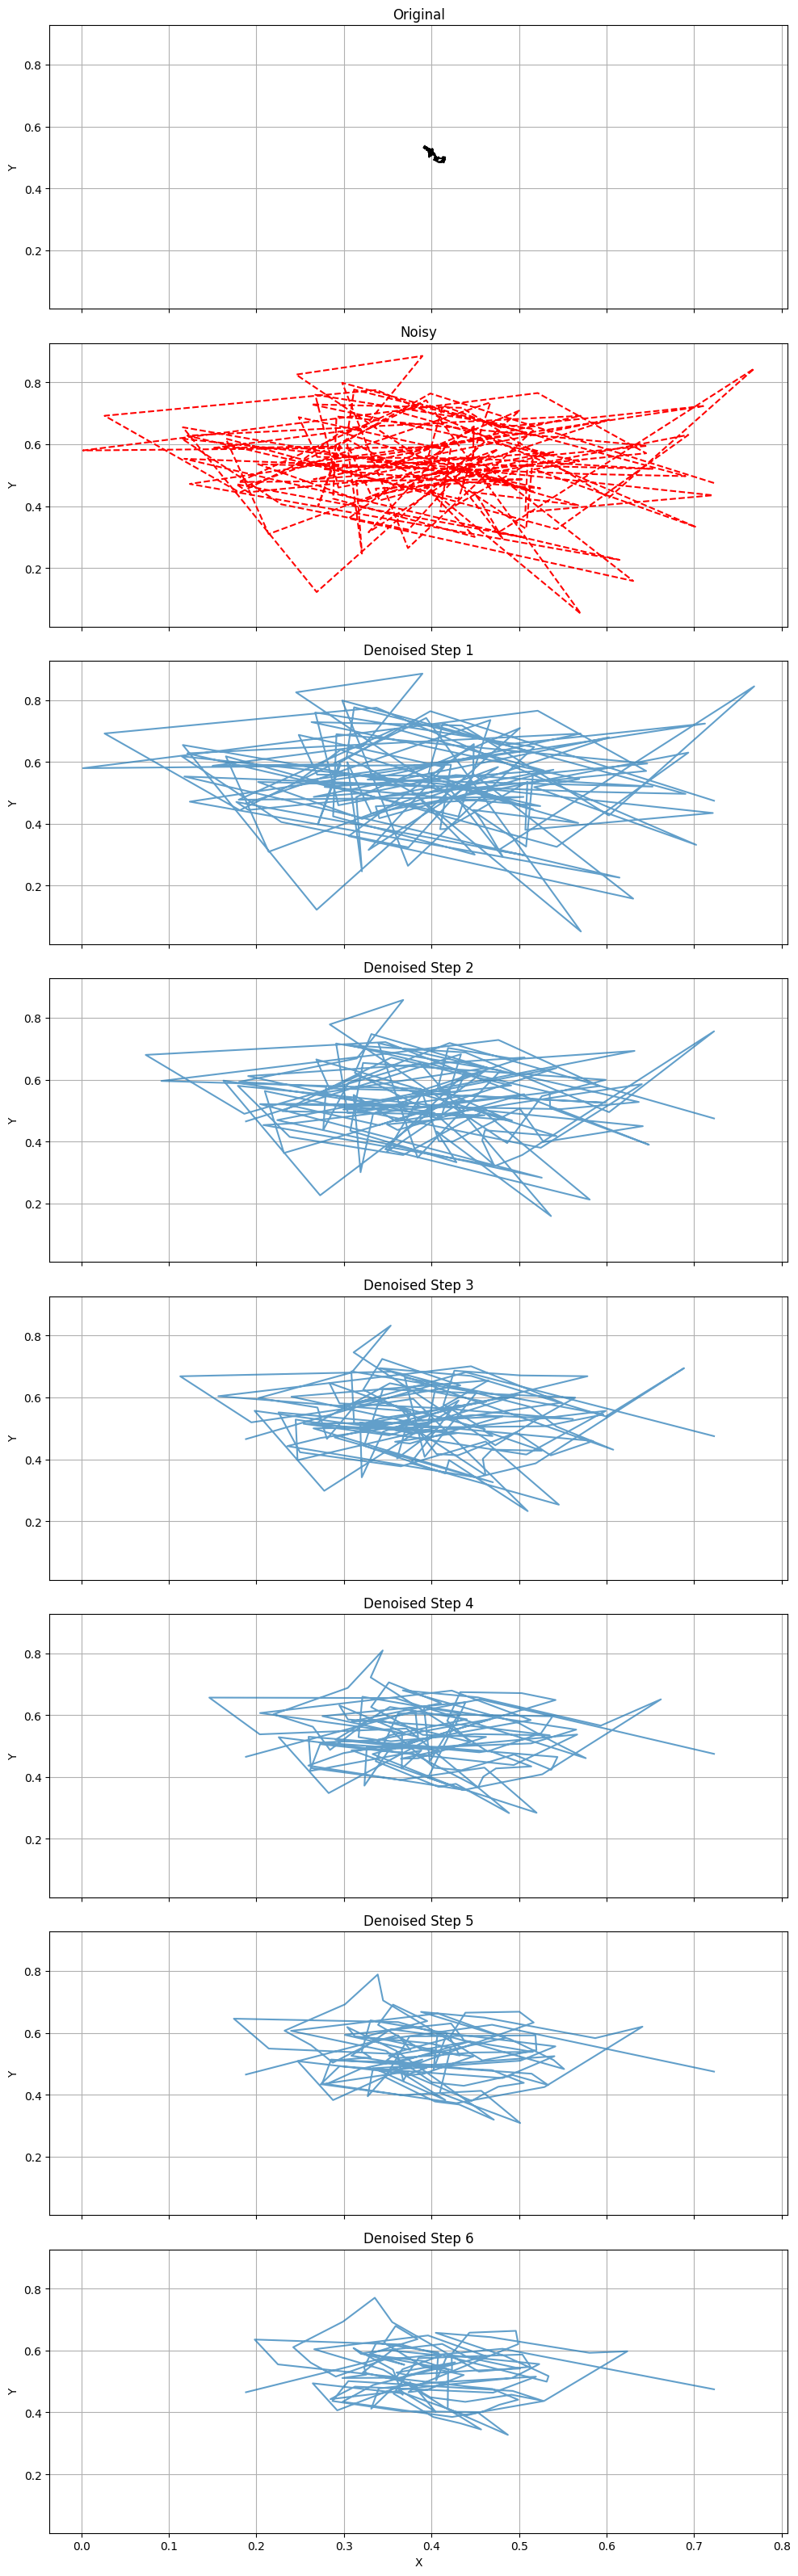

In [7]:
# Plot landmark trajectory of one landmark (e.g., right wrist index 16–17)
landmark_idx = 16  # index in 96 landmarks
x_idx, y_idx = landmark_idx * 3, landmark_idx * 3 + 1

# Create subplots for each stage
num_steps = len(intermediates)
fig, axes = plt.subplots(num_steps + 2, 1, figsize=(10, 4 * (num_steps + 2)), sharex=True, sharey=True)

# Plot Original
axes[0].plot(keypoints[:, x_idx], keypoints[:, y_idx], label="Original", c='black')
axes[0].set_title("Original")
axes[0].grid(True)
axes[0].set_ylabel("Y")

# Plot Noisy
axes[1].plot(noisy_kp[:, x_idx], noisy_kp[:, y_idx], label="Noisy", linestyle='--', c='red')
axes[1].set_title("Noisy")
axes[1].grid(True)
axes[1].set_ylabel("Y")


# Plot Denoised steps
for i, step in enumerate(intermediates):
    axes[i + 2].plot(step[:, x_idx], step[:, y_idx], label=f"Denoised {i+1}", alpha=0.7)
    axes[i + 2].set_title(f"Denoised Step {i+1}")
    axes[i + 2].grid(True)
    axes[i + 2].set_ylabel("Y")

# Set common labels
axes[-1].set_xlabel("X")

plt.tight_layout()
plt.show()

# Task
Create a Colab notebook that demonstrates adding noise to a trajectory and then denoising it using a diffusion process. The notebook should be well-structured, include explanations, and allow interactive adjustment of parameters like noise level and denoising parameters.

## Refactor the code for reusability

### Subtask:
Encapsulate the noise addition and denoising steps into functions that can be easily called with different parameters.


**Reasoning**:
Encapsulate the noise addition and denoising steps into a function as requested by the subtask.



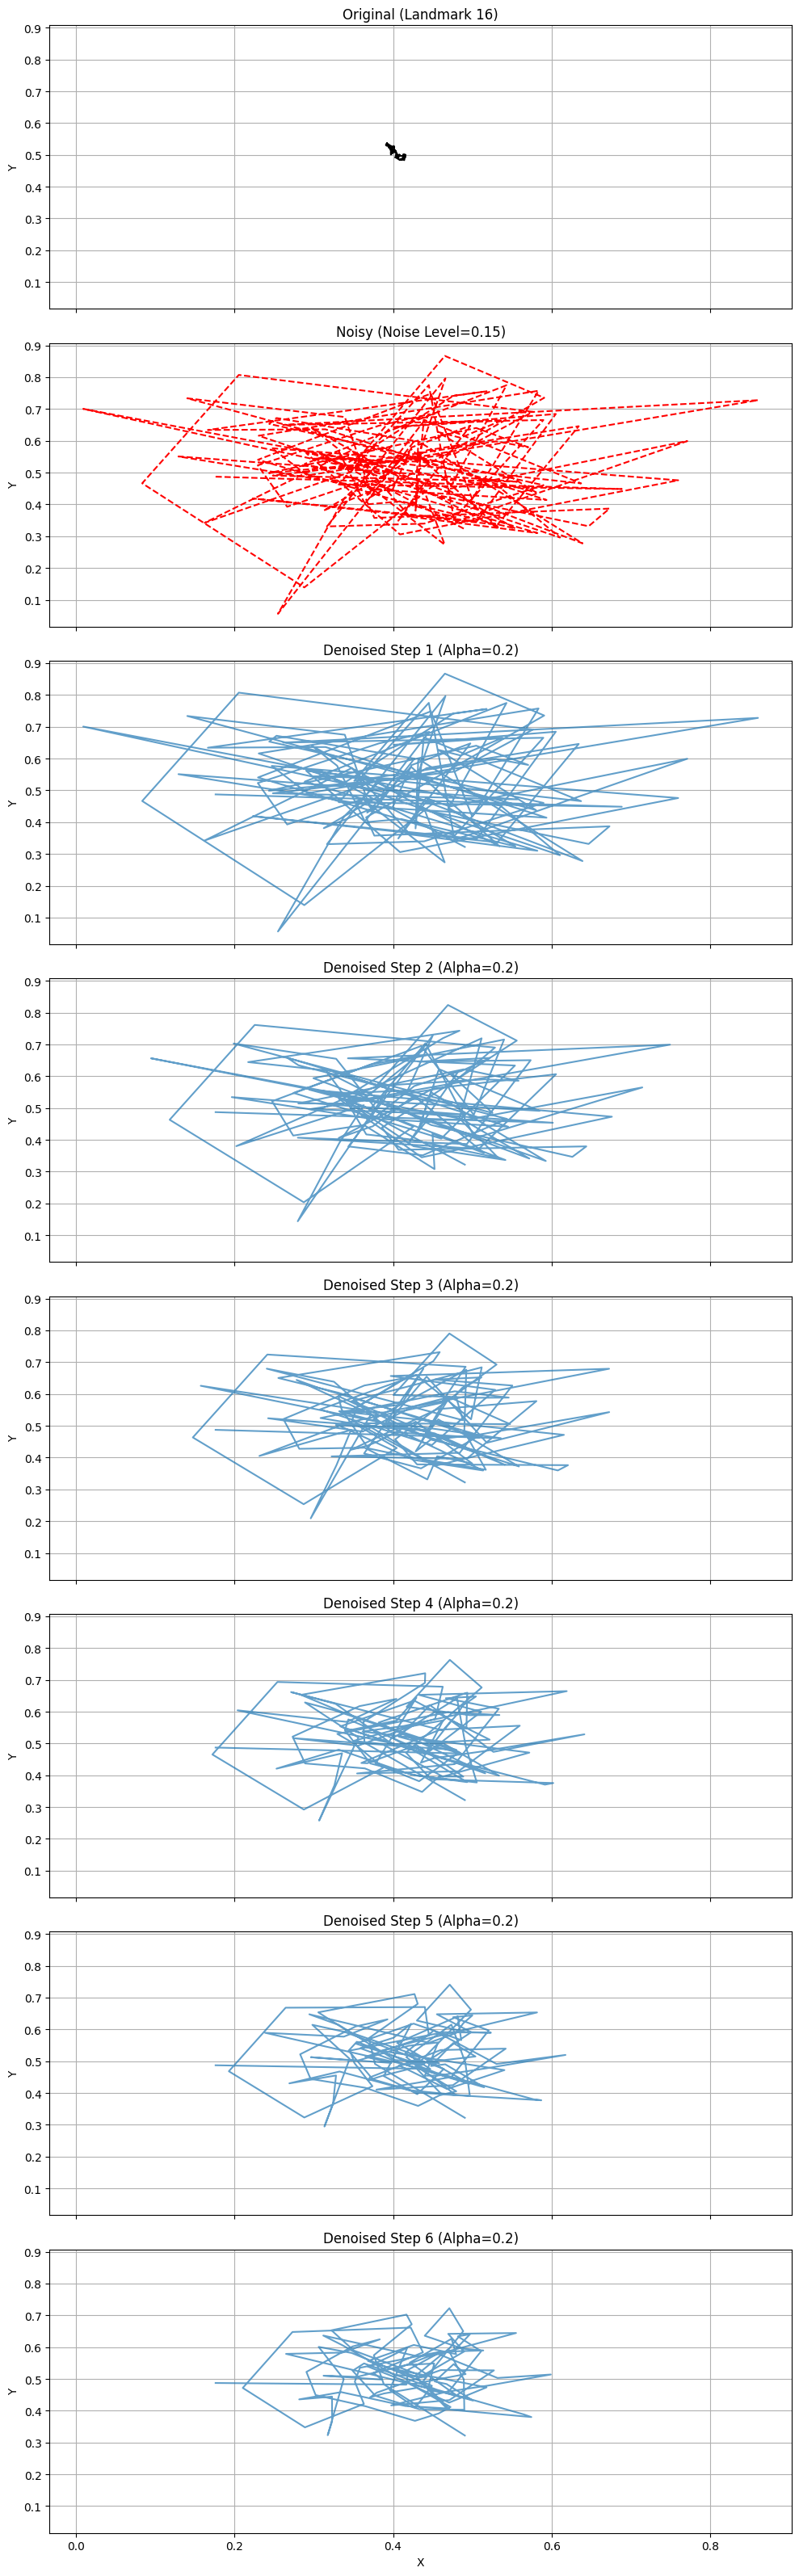

In [11]:
# Simulate diffusion with interactive parameters
noisy_kp, intermediates = simulate_diffusion(keypoints, noise_level, alpha, num_denoising_steps)

# Plot landmark trajectory of the selected landmark
x_idx, y_idx = landmark_idx * 3, landmark_idx * 3 + 1

# Create subplots for each stage
num_steps = len(intermediates)
fig, axes = plt.subplots(num_steps + 2, 1, figsize=(10, 4 * (num_steps + 2)), sharex=True, sharey=True)

# Plot Original
axes[0].plot(keypoints[:, x_idx], keypoints[:, y_idx], label="Original", c='black')
axes[0].set_title(f"Original (Landmark {landmark_idx})")
axes[0].grid(True)
axes[0].set_ylabel("Y")

# Plot Noisy
axes[1].plot(noisy_kp[:, x_idx], noisy_kp[:, y_idx], label="Noisy", linestyle='--', c='red')
axes[1].set_title(f"Noisy (Noise Level={noise_level})")
axes[1].grid(True)
axes[1].set_ylabel("Y")

# Plot Denoised steps
for i, step in enumerate(intermediates):
    axes[i + 2].plot(step[:, x_idx], step[:, y_idx], label=f"Denoised {i+1}", alpha=0.7)
    axes[i + 2].set_title(f"Denoised Step {i+1} (Alpha={alpha})")
    axes[i + 2].grid(True)
    axes[i + 2].set_ylabel("Y")

# Set common labels
axes[-1].set_xlabel("X")

plt.tight_layout()
plt.show()

In [8]:
def simulate_diffusion(keypoints, noise_level, alpha, num_denoising_steps):
    """
    Simulates a diffusion-style denoising process on keypoints.

    Args:
        keypoints (np.ndarray): The original keypoint data.
        noise_level (float): The standard deviation of the noise to add.
        alpha (float): The alpha parameter for the denoising step.
        num_denoising_steps (int): The number of denoising iterations.

    Returns:
        tuple: A tuple containing:
            - noisy_keypoints (np.ndarray): The keypoints after adding noise.
            - intermediates (list): A list of np.ndarrays, each representing the keypoints
                                    after a denoising step.
    """
    noisy_kp = add_noise(keypoints, noise_level=noise_level)

    denoised = noisy_kp.copy()
    intermediates = [denoised.copy()]
    for _ in range(num_denoising_steps):
        denoised = denoise(denoised, alpha=alpha)
        intermediates.append(denoised.copy())

    return noisy_kp, intermediates

# Task
Improve the notebook by implementing and demonstrating different types of noise (salt-and-pepper, impulse, occlusion, and jitter) that can be added to trajectory data, allowing the user to select the noise type and comparing the results visually.

## Implement salt-and-pepper noise

### Subtask:
Create a new function `add_salt_pepper_noise` that adds salt-and-pepper noise to the keypoint data.


**Reasoning**:
Define the `add_salt_pepper_noise` function as requested by the subtask, following the provided instructions.



In [17]:
def add_salt_pepper_noise(data, probability=0.01):
    """
    Adds salt-and-pepper noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being affected by noise.

    Returns:
        np.ndarray: The keypoints after adding salt-and-pepper noise.
    """
    noisy_data = data.copy()
    random_matrix = np.random.rand(*data.shape)

    # Salt noise
    salt_mask = random_matrix < probability / 2
    noisy_data[salt_mask] = np.max(data) # Using max value as a high constant

    # Pepper noise
    pepper_mask = random_matrix > 1 - probability / 2
    noisy_data[pepper_mask] = np.min(data) # Using min value as a low constant

    return noisy_data

## Implement impulse noise

### Subtask:
Create a new function `add_impulse_noise` that adds impulse noise to the keypoint data.


**Reasoning**:
Define the `add_impulse_noise` function as requested by the subtask.



In [18]:
def add_impulse_noise(data, probability=0.01, value_range=None):
    """
    Adds impulse noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being affected by noise.
        value_range (tuple, optional): The range (min, max) from which to draw random values for impulse noise.
                                        If None, uses the min/max of the original data.

    Returns:
        np.ndarray: The keypoints after adding impulse noise.
    """
    noisy_data = data.copy()
    random_mask = np.random.rand(*data.shape)

    if value_range is None:
        min_val = np.min(data)
        max_val = np.max(data)
    else:
        min_val, max_val = value_range

    impulse_mask = random_mask < probability
    num_noisy_points = np.sum(impulse_mask)

    noisy_data[impulse_mask] = np.random.uniform(min_val, max_val, num_noisy_points)

    return noisy_data

## Implement occlusion noise

### Subtask:
Create a new function `add_occlusion_noise` that simulates occlusions by setting keypoints to zero or NaN.


**Reasoning**:
Define the `add_occlusion_noise` function as requested by the subtask, copying the data, creating a random mask based on probability, and setting masked values to NaN.



In [19]:
def add_occlusion_noise(data, probability=0.05):
    """
    Simulates occlusions by setting keypoints to NaN.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being occluded.

    Returns:
        np.ndarray: The keypoints after simulating occlusion.
    """
    noisy_data = data.copy()
    random_mask = np.random.rand(*data.shape)
    occlusion_mask = random_mask < probability
    noisy_data[occlusion_mask] = np.nan
    return noisy_data

## Implement jitter noise

### Subtask:
Create a new function `add_jitter_noise` that adds temporally correlated noise.


**Reasoning**:
Define the `add_jitter_noise` function as requested by the subtask, implementing temporal correlation using a simple moving average approach.



In [20]:
def add_jitter_noise(data, noise_level=0.1, correlation_factor=0.5):
    """
    Adds temporally correlated (jitter) noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        noise_level (float): The standard deviation of the random noise component.
        correlation_factor (float): A factor (between 0 and 1) controlling the temporal correlation.
                                    Higher values mean more correlation with the previous time step's noise.

    Returns:
        np.ndarray: The keypoints after adding jitter noise.
    """
    noisy_data = data.copy()
    noise = np.random.normal(0, noise_level, data.shape)

    # Apply temporal correlation using a simple moving average
    correlated_noise = np.zeros_like(noise)
    correlated_noise[0, :] = noise[0, :] # Initialize the first time step

    for t in range(1, data.shape[0]):
        correlated_noise[t, :] = (1 - correlation_factor) * noise[t, :] + correlation_factor * correlated_noise[t-1, :]

    noisy_data += correlated_noise

    return noisy_data

## Update the `simulate diffusion` function

### Subtask:
Modify the `simulate_diffusion` function to accept a parameter specifying which type of noise to add.


**Reasoning**:
Modify the `simulate_diffusion` function to accept a `noise_type` parameter and apply the corresponding noise function based on its value.



In [21]:
def add_noise(data, noise_level=0.1):
    """
    Adds Gaussian noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        noise_level (float): The standard deviation of the Gaussian noise.

    Returns:
        np.ndarray: The keypoints after adding Gaussian noise.
    """
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def add_salt_pepper_noise(data, probability=0.01):
    """
    Adds salt-and-pepper noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being affected by noise.

    Returns:
        np.ndarray: The keypoints after adding salt-and-pepper noise.
    """
    noisy_data = data.copy()
    random_matrix = np.random.rand(*data.shape)

    # Salt noise
    salt_mask = random_matrix < probability / 2
    noisy_data[salt_mask] = np.max(data) # Using max value as a high constant

    # Pepper noise
    pepper_mask = random_matrix > 1 - probability / 2
    noisy_data[pepper_mask] = np.min(data) # Using min value as a low constant

    return noisy_data

def add_impulse_noise(data, probability=0.01, value_range=None):
    """
    Adds impulse noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being affected by noise.
        value_range (tuple, optional): The range (min, max) from which to draw random values for impulse noise.
                                        If None, uses the min/max of the original data.

    Returns:
        np.ndarray: The keypoints after adding impulse noise.
    """
    noisy_data = data.copy()
    random_mask = np.random.rand(*data.shape)

    if value_range is None:
        min_val = np.min(data)
        max_val = np.max(data)
    else:
        min_val, max_val = value_range

    impulse_mask = random_mask < probability
    num_noisy_points = np.sum(impulse_mask)

    noisy_data[impulse_mask] = np.random.uniform(min_val, max_val, num_noisy_points)

    return noisy_data

def add_occlusion_noise(data, probability=0.05):
    """
    Simulates occlusions by setting keypoints to NaN.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being occluded.

    Returns:
        np.ndarray: The keypoints after simulating occlusion.
    """
    noisy_data = data.copy()
    random_mask = np.random.rand(*data.shape)
    occlusion_mask = random_mask < probability
    noisy_data[occlusion_mask] = np.nan
    return noisy_data

def add_jitter_noise(data, noise_level=0.1, correlation_factor=0.5):
    """
    Adds temporally correlated (jitter) noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        noise_level (float): The standard deviation of the random noise component.
        correlation_factor (float): A factor (between 0 and 1) controlling the temporal correlation.
                                    Higher values mean more correlation with the previous time step's noise.

    Returns:
        np.ndarray: The keypoints after adding jitter noise.
    """
    noisy_data = data.copy()
    noise = np.random.normal(0, noise_level, data.shape)

    # Apply temporal correlation using a simple moving average
    correlated_noise = np.zeros_like(noise)
    correlated_noise[0, :] = noise[0, :] # Initialize the first time step

    for t in range(1, data.shape[0]):
        correlated_noise[t, :] = (1 - correlation_factor) * noise[t, :] + correlation_factor * correlated_noise[t-1, :]

    noisy_data += correlated_noise

    return noisy_data


def simulate_diffusion(keypoints, noise_level=0.1, alpha=0.2, num_denoising_steps=5, noise_type='gaussian', noise_probability=0.01, correlation_factor=0.5, value_range=None):
    """
    Simulates a diffusion-style denoising process on keypoints with different noise types.

    Args:
        keypoints (np.ndarray): The original keypoint data.
        noise_level (float): The standard deviation of the noise for 'gaussian' and 'jitter' noise types.
        alpha (float): The alpha parameter for the denoising step.
        num_denoising_steps (int): The number of denoising iterations.
        noise_type (str): The type of noise to add. Can be 'gaussian', 'salt_pepper', 'impulse', 'occlusion', or 'jitter'.
        noise_probability (float): The probability for 'salt_pepper', 'impulse', and 'occlusion' noise types.
        correlation_factor (float): The correlation factor for 'jitter' noise.
        value_range (tuple, optional): The value range for 'impulse' noise.

    Returns:
        tuple: A tuple containing:
            - noisy_keypoints (np.ndarray): The keypoints after adding noise.
            - intermediates (list): A list of np.ndarrays, each representing the keypoints
                                    after a denoising step.
    """
    if noise_type == 'gaussian':
        noisy_kp = add_noise(keypoints, noise_level=noise_level)
    elif noise_type == 'salt_pepper':
        noisy_kp = add_salt_pepper_noise(keypoints, probability=noise_probability)
    elif noise_type == 'impulse':
        noisy_kp = add_impulse_noise(keypoints, probability=noise_probability, value_range=value_range)
    elif noise_type == 'occlusion':
        noisy_kp = add_occlusion_noise(keypoints, probability=noise_probability)
    elif noise_type == 'jitter':
        noisy_kp = add_jitter_noise(keypoints, noise_level=noise_level, correlation_factor=correlation_factor)
    else:
        raise ValueError(f"Unknown noise type: {noise_type}")

    denoised = noisy_kp.copy()
    intermediates = [denoised.copy()]
    for _ in range(num_denoising_steps):
        # Handle NaNs for occlusion noise during denoising (simple linear interpolation)
        if noise_type == 'occlusion':
             # Simple linear interpolation for NaNs
            nan_indices = np.isnan(denoised)
            if np.any(nan_indices):
                # Interpolate column by column
                for col in range(denoised.shape[1]):
                    col_data = denoised[:, col]
                    non_nan_indices = np.where(~np.isnan(col_data))[0]
                    if len(non_nan_indices) > 1:
                         interp_func = np.interp(np.arange(len(col_data)), non_nan_indices, col_data[non_nan_indices])
                         denoised[:, col][nan_indices[:,col]] = interp_func[nan_indices[:,col]]


        denoised = denoise(denoised, alpha=alpha)
        intermediates.append(denoised.copy())

    return noisy_kp, intermediates

def denoise(data, alpha=0.1):
    """
    Applies a simple smoothing (denoising) filter to the data.

    Args:
        data (np.ndarray): The input data to denoise.
        alpha (float): The smoothing factor (between 0 and 1).

    Returns:
        np.ndarray: The denoised data.
    """
    smoothed = data.copy()
    for i in range(1, len(data)-1):
        smoothed[i] = (1 - alpha) * smoothed[i] + alpha * 0.5 * (smoothed[i-1] + smoothed[i+1])
    return smoothed


## Update plotting and analysis

### Subtask:
Adjust the plotting and any future quantitative analysis sections to handle the different types of noise and allow comparison.


**Reasoning**:
Modify the plotting code to dynamically update titles and labels based on the selected noise type and parameters, and calculate and display MSE for quantitative comparison.



MSE for Noisy data (occlusion): 0.000000
MSE for Final Denoised data (occlusion): 0.000688


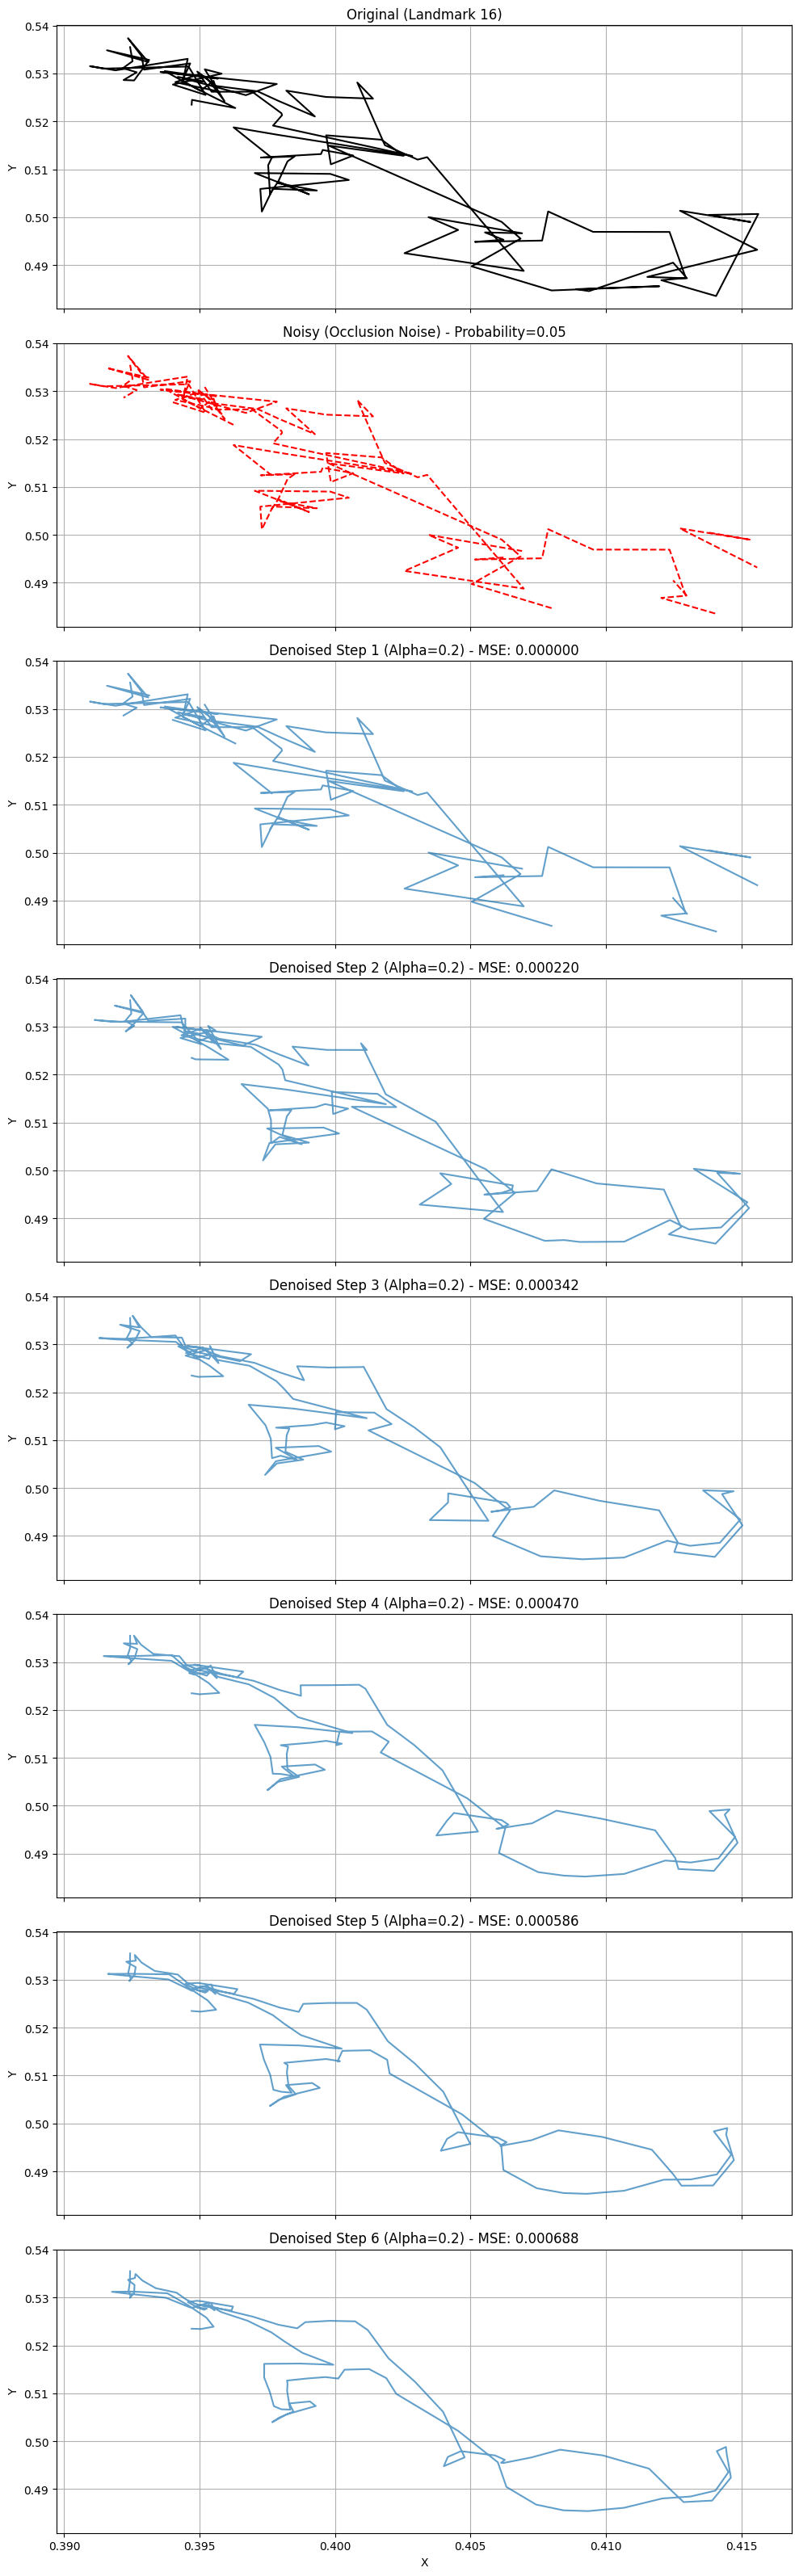

In [22]:
def calculate_mse(original, denoised):
    """
    Calculates the Mean Squared Error between the original and denoised data,
    ignoring NaN values.

    Args:
        original (np.ndarray): The original data.
        denoised (np.ndarray): The denoised data.

    Returns:
        float: The Mean Squared Error.
    """
    # Ensure arrays have the same shape
    if original.shape != denoised.shape:
        raise ValueError("Original and denoised data must have the same shape.")

    # Calculate squared differences, ignoring NaNs
    squared_diff = (original - denoised)**2
    # Use nanmean to ignore NaN values when calculating the mean
    mse = np.nanmean(squared_diff)

    return mse

# Select noise type and parameters
noise_type = 'occlusion' # Change this to 'gaussian', 'salt_pepper', 'impulse', 'occlusion', or 'jitter'
noise_level = 0.15       # Used for 'gaussian' and 'jitter'
noise_probability = 0.05 # Used for 'salt_pepper', 'impulse', and 'occlusion'
correlation_factor = 0.7 # Used for 'jitter'
value_range = (np.min(keypoints), np.max(keypoints)) # Used for 'impulse'

# Select denoising parameters
alpha = 0.2
num_denoising_steps = 5

# Select landmark to plot (e.g., right wrist index 16–17)
landmark_idx = 16
x_idx, y_idx = landmark_idx * 3, landmark_idx * 3 + 1


# Simulate diffusion with interactive parameters based on selected noise type
if noise_type == 'gaussian':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_level=noise_level, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Noise Level={noise_level}"
elif noise_type == 'salt_pepper':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_probability=noise_probability, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Probability={noise_probability}"
elif noise_type == 'impulse':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_probability=noise_probability, value_range=value_range, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Probability={noise_probability}, Value Range={value_range}"
elif noise_type == 'occlusion':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_probability=noise_probability, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Probability={noise_probability}"
elif noise_type == 'jitter':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_level=noise_level, correlation_factor=correlation_factor, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Noise Level={noise_level}, Correlation={correlation_factor}"
else:
     raise ValueError(f"Unknown noise type selected for plotting: {noise_type}")


# Calculate MSE for noisy and final denoised data
mse_noisy = calculate_mse(keypoints, noisy_kp)
mse_final_denoised = calculate_mse(keypoints, intermediates[-1])

# Calculate MSE for all intermediate steps
mse_intermediates = {}
for i, step in enumerate(intermediates):
    mse_intermediates[f"Denoised Step {i+1}"] = calculate_mse(keypoints, step)


print(f"MSE for Noisy data ({noise_type}): {mse_noisy:.6f}")
print(f"MSE for Final Denoised data ({noise_type}): {mse_final_denoised:.6f}")


# Plot landmark trajectory of the selected landmark
num_steps = len(intermediates)
fig, axes = plt.subplots(num_steps + 2, 1, figsize=(10, 4 * (num_steps + 2)), sharex=True, sharey=True)

# Plot Original
axes[0].plot(keypoints[:, x_idx], keypoints[:, y_idx], label="Original", c='black')
axes[0].set_title(f"Original (Landmark {landmark_idx})")
axes[0].grid(True)
axes[0].set_ylabel("Y")

# Plot Noisy
axes[1].plot(noisy_kp[:, x_idx], noisy_kp[:, y_idx], label="Noisy", linestyle='--', c='red')
axes[1].set_title(f"Noisy ({noise_type.replace('_', ' ').title()} Noise) - {noise_param_str}")
axes[1].grid(True)
axes[1].set_ylabel("Y")


# Plot Denoised steps
for i, step in enumerate(intermediates):
    axes[i + 2].plot(step[:, x_idx], step[:, y_idx], label=f"Denoised {i+1}", alpha=0.7)
    axes[i + 2].set_title(f"Denoised Step {i+1} (Alpha={alpha}) - MSE: {mse_intermediates[f'Denoised Step {i+1}']:.6f}")
    axes[i + 2].grid(True)
    axes[i + 2].set_ylabel("Y")

# Set common labels
axes[-1].set_xlabel("X")

plt.tight_layout()
plt.show()


## Summary:

### Data Analysis Key Findings

*   New functions were successfully implemented to add different types of noise to keypoint data: `add_salt_pepper_noise`, `add_impulse_noise`, `add_occlusion_noise`, and `add_jitter_noise`.
*   The `simulate_diffusion` function was modified to accept a `noise_type` parameter, allowing the user to select between 'gaussian', 'salt_pepper', 'impulse', 'occlusion', and 'jitter' noise.
*   The plotting and analysis sections were updated to dynamically display information based on the selected noise type and its parameters.
*   Mean Squared Error (MSE) calculation was implemented to quantitatively assess the effectiveness of the denoising process for different noise types.
*   Markdown cells were added to explain each implemented noise model, its parameters, and how to select the noise type within the notebook.

### Insights or Next Steps

*   The implementation of various noise types and the ability to select between them provides a flexible framework for testing the robustness of denoising algorithms against different real-world data corruption scenarios.
*   Further quantitative analysis comparing the performance (e.g., using MSE) of the simple diffusion model across all implemented noise types and varying noise levels would provide valuable insights into its strengths and weaknesses.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#!pip install -q matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import os

# Load keypoints for "bring_water_for_me"
keypoint_path = "/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Keypoints/bring_water_for_me_keypoints.npy"
keypoints = np.load(keypoint_path)
print("Keypoints shape:", keypoints.shape)  # (116, 288)

def add_noise(data, noise_level=0.1):
    """
    Adds Gaussian noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        noise_level (float): The standard deviation of the Gaussian noise.

    Returns:
        np.ndarray: The keypoints after adding Gaussian noise.
    """
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def add_salt_pepper_noise(data, probability=0.01):
    """
    Adds salt-and-pepper noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being affected by noise.

    Returns:
        np.ndarray: The keypoints after adding salt-and-pepper noise.
    """
    noisy_data = data.copy()
    random_matrix = np.random.rand(*data.shape)

    # Salt noise
    salt_mask = random_matrix < probability / 2
    noisy_data[salt_mask] = np.max(data) # Using max value as a high constant

    # Pepper noise
    pepper_mask = random_matrix > 1 - probability / 2
    noisy_data[pepper_mask] = np.min(data) # Using min value as a low constant

    return noisy_data

def add_impulse_noise(data, probability=0.01, value_range=None):
    """
    Adds impulse noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being affected by noise.
        value_range (tuple, optional): The range (min, max) from which to draw random values for impulse noise.
                                        If None, uses the min/max of the original data.

    Returns:
        np.ndarray: The keypoints after adding impulse noise.
    """
    noisy_data = data.copy()
    random_mask = np.random.rand(*data.shape)

    if value_range is None:
        min_val = np.min(data)
        max_val = np.max(data)
    else:
        min_val, max_val = value_range

    impulse_mask = random_mask < probability
    num_noisy_points = np.sum(impulse_mask)

    noisy_data[impulse_mask] = np.random.uniform(min_val, max_val, num_noisy_points)

    return noisy_data

def add_occlusion_noise(data, probability=0.05):
    """
    Simulates occlusions by setting keypoints to NaN.

    Args:
        data (np.ndarray): The original keypoint data.
        probability (float): The probability of a keypoint being occluded.

    Returns:
        np.ndarray: The keypoints after simulating occlusion.
    """
    noisy_data = data.copy()
    random_mask = np.random.rand(*data.shape)
    occlusion_mask = random_mask < probability
    noisy_data[occlusion_mask] = np.nan
    return noisy_data

def add_jitter_noise(data, noise_level=0.1, correlation_factor=0.5):
    """
    Adds temporally correlated (jitter) noise to the keypoint data.

    Args:
        data (np.ndarray): The original keypoint data.
        noise_level (float): The standard deviation of the random noise component.
        correlation_factor (float): A factor (between 0 and 1) controlling the temporal correlation.
                                    Higher values mean more correlation with the previous time step's noise.

    Returns:
        np.ndarray: The keypoints after adding jitter noise.
    """
    noisy_data = data.copy()
    noise = np.random.normal(0, noise_level, data.shape)

    # Apply temporal correlation using a simple moving average
    correlated_noise = np.zeros_like(noise)
    correlated_noise[0, :] = noise[0, :] # Initialize the first time step

    for t in range(1, data.shape[0]):
        correlated_noise[t, :] = (1 - correlation_factor) * noise[t, :] + correlation_factor * correlated_noise[t-1, :]

    noisy_data += correlated_noise

    return noisy_data


def simulate_diffusion(keypoints, noise_level=0.1, alpha=0.2, num_denoising_steps=5, noise_type='gaussian', noise_probability=0.01, correlation_factor=0.5, value_range=None):
    """
    Simulates a diffusion-style denoising process on keypoints with different noise types.

    Args:
        keypoints (np.ndarray): The original keypoint data.
        noise_level (float): The standard deviation of the noise for 'gaussian' and 'jitter' noise types.
        alpha (float): The alpha parameter for the denoising step.
        num_denoising_steps (int): The number of denoising iterations.
        noise_type (str): The type of noise to add. Can be 'gaussian', 'salt_pepper', 'impulse', 'occlusion', or 'jitter'.
        noise_probability (float): The probability for 'salt_pepper', 'impulse', and 'occlusion' noise types.
        correlation_factor (float): The correlation factor for 'jitter' noise.
        value_range (tuple, optional): The value range for 'impulse' noise.

    Returns:
        tuple: A tuple containing:
            - noisy_keypoints (np.ndarray): The keypoints after adding noise.
            - intermediates (list): A list of np.ndarrays, each representing the keypoints
                                    after a denoising step.
    """
    if noise_type == 'gaussian':
        noisy_kp = add_noise(keypoints, noise_level=noise_level)
    elif noise_type == 'salt_pepper':
        noisy_kp = add_salt_pepper_noise(keypoints, probability=noise_probability)
    elif noise_type == 'impulse':
        noisy_kp = add_impulse_noise(keypoints, probability=noise_probability, value_range=value_range)
    elif noise_type == 'occlusion':
        noisy_kp = add_occlusion_noise(keypoints, probability=noise_probability)
    elif noise_type == 'jitter':
        noisy_kp = add_jitter_noise(keypoints, noise_level=noise_level, correlation_factor=correlation_factor)
    else:
        raise ValueError(f"Unknown noise type: {noise_type}")

    denoised = noisy_kp.copy()
    intermediates = [denoised.copy()]
    for _ in range(num_denoising_steps):
        # Handle NaNs for occlusion noise during denoising (simple linear interpolation)
        if noise_type == 'occlusion':
             # Simple linear interpolation for NaNs
            nan_indices = np.isnan(denoised)
            if np.any(nan_indices):
                # Interpolate column by column
                for col in range(denoised.shape[1]):
                    col_data = denoised[:, col]
                    non_nan_indices = np.where(~np.isnan(col_data))[0]
                    if len(non_nan_indices) > 1:
                         interp_func = np.interp(np.arange(len(col_data)), non_nan_indices, col_data[non_nan_indices])
                         denoised[:, col][nan_indices[:,col]] = interp_func[nan_indices[:,col]]


        denoised = denoise(denoised, alpha=alpha)
        intermediates.append(denoised.copy())

    return noisy_kp, intermediates

def denoise(data, alpha=0.1):
    """
    Applies a simple smoothing (denoising) filter to the data.

    Args:
        data (np.ndarray): The input data to denoise.
        alpha (float): The smoothing factor (between 0 and 1).

    Returns:
        np.ndarray: The denoised data.
    """
    smoothed = data.copy()
    for i in range(1, len(data)-1):
        smoothed[i] = (1 - alpha) * smoothed[i] + alpha * 0.5 * (smoothed[i-1] + smoothed[i+1])
    return smoothed

def calculate_mse(original, denoised):
    """
    Calculates the Mean Squared Error between the original and denoised data,
    ignoring NaN values.

    Args:
        original (np.ndarray): The original data.
        denoised (np.ndarray): The denoised data.

    Returns:
        float: The Mean Squared Error.
    """
    # Ensure arrays have the same shape
    if original.shape != denoised.shape:
        raise ValueError("Original and denoised data must have the same shape.")

    # Calculate squared differences, ignoring NaNs
    squared_diff = (original - denoised)**2
    # Use nanmean to ignore NaN values when calculating the mean
    mse = np.nanmean(squared_diff)

    return mse

# Select noise type and parameters
noise_type = 'occlusion' # Change this to 'gaussian', 'salt_pepper', 'impulse', 'occlusion', or 'jitter'
noise_level = 0.15       # Used for 'gaussian' and 'jitter'
noise_probability = 0.05 # Used for 'salt_pepper', 'impulse', and 'occlusion'
correlation_factor = 0.7 # Used for 'jitter'
value_range = (np.min(keypoints), np.max(keypoints)) # Used for 'impulse'

# Select denoising parameters
alpha = 0.2
num_denoising_steps = 5

# Select landmark to plot (e.g., right wrist index 16–17)
landmark_idx = 16
x_idx, y_idx = landmark_idx * 3, landmark_idx * 3 + 1


# Simulate diffusion with interactive parameters based on selected noise type
if noise_type == 'gaussian':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_level=noise_level, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Noise Level={noise_level}"
elif noise_type == 'salt_pepper':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_probability=noise_probability, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Probability={noise_probability}"
elif noise_type == 'impulse':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_probability=noise_probability, value_range=value_range, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Probability={noise_probability}, Value Range={value_range}"
elif noise_type == 'occlusion':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_probability=noise_probability, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Probability={noise_probability}"
elif noise_type == 'jitter':
    noisy_kp, intermediates = simulate_diffusion(keypoints, noise_type=noise_type, noise_level=noise_level, correlation_factor=correlation_factor, alpha=alpha, num_denoising_steps=num_denoising_steps)
    noise_param_str = f"Noise Level={noise_level}, Correlation={correlation_factor}"
else:
     raise ValueError(f"Unknown noise type selected for plotting: {noise_type}")


# Calculate MSE for noisy and final denoised data
mse_noisy = calculate_mse(keypoints, noisy_kp)
mse_final_denoised = calculate_mse(keypoints, intermediates[-1])

# Calculate MSE for all intermediate steps
mse_intermediates = {}
for i, step in enumerate(intermediates):
    mse_intermediates[f"Denoised Step {i+1}"] = calculate_mse(keypoints, step)


print(f"MSE for Noisy data ({noise_type}): {mse_noisy:.6f}")
print(f"MSE for Final Denoised data ({noise_type}): {mse_final_denoised:.6f}")


# Plot landmark trajectory of the selected landmark
num_steps = len(intermediates)
fig, axes = plt.subplots(num_steps + 2, 1, figsize=(10, 4 * (num_steps + 2)), sharex=True, sharey=True)

# Plot Original
axes[0].plot(keypoints[:, x_idx], keypoints[:, y_idx], label="Original", c='black')
axes[0].set_title(f"Original (Landmark {landmark_idx})")
axes[0].grid(True)
axes[0].set_ylabel("Y")

# Plot Noisy
axes[1].plot(noisy_kp[:, x_idx], noisy_kp[:, y_idx], label="Noisy", linestyle='--', c='red')
axes[1].set_title(f"Noisy ({noise_type.replace('_', ' ').title()} Noise) - {noise_param_str}")
axes[1].grid(True)
axes[1].set_ylabel("Y")


# Plot Denoised steps
for i, step in enumerate(intermediates):
    axes[i + 2].plot(step[:, x_idx], step[:, y_idx], label=f"Denoised {i+1}", alpha=0.7)
    axes[i + 2].set_title(f"Denoised Step {i+1} (Alpha={alpha}) - MSE: {mse_intermediates[f'Denoised Step {i+1}']:.6f}")
    axes[i + 2].grid(True)
    axes[i + 2].set_ylabel("Y")

# Set common labels
axes[-1].set_xlabel("X")

plt.tight_layout()
plt.show()